<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/BERT_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-tuning modelo BERT com Keras

# Dados para análise de sentimento

In [1]:
!wget https://github.com/Rogerio-mack/work/raw/main/sentiment.zip

--2023-09-09 13:25:39--  https://github.com/Rogerio-mack/work/raw/main/sentiment.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Rogerio-mack/work/main/sentiment.zip [following]
--2023-09-09 13:25:39--  https://raw.githubusercontent.com/Rogerio-mack/work/main/sentiment.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44448 (43K) [application/zip]
Saving to: ‘sentiment.zip’

sentiment.zip       100%[===================>]  43.41K  --.-KB/s    in 0.03s   

2023-09-09 13:25:40 (1.26 MB/s) - ‘sentiment.zip’ saved [44448/44448]



In [2]:
!unzip sentiment.zip

Archive:  sentiment.zip
  inflating: sentiment_train.csv     


In [3]:
import pandas as pd
df = pd.read_csv("sentiment_train.csv")
df.head()

,sentence,label
0,Ok brokeback mountain is such a horrible movie.,0
1,Brokeback Mountain was so awesome.,1
2,friday hung out with kelsie and we went and sa...,0
3,I am going to start reading the Harry Potter s...,1
4,"Is it just me, or does Harry Potter suck?...",0


In [4]:
df.shape

(5668, 2)

# Separando dados de validação e teste

In [35]:
from sklearn.model_selection import train_test_split

train_text, temp_text, train_labels, temp_labels = train_test_split(df['sentence'], df['label'],
                                                                    random_state = 1,
                                                                    test_size = 0.3,
                                                                    stratify = df['label'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state = 1,
                                                                test_size = 0.5,
                                                                stratify = temp_labels)

# Carrega dependências (transformer e bert)

In [7]:
import tensorflow as tf
import tensorflow_hub as hub

modelo = hub.load("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


In [9]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.9 MB/s eta 0:00:00


In [10]:
from transformers import BertTokenizer, BertForSequenceClassification

In [11]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define tamanho do texto para otimizar tokenização

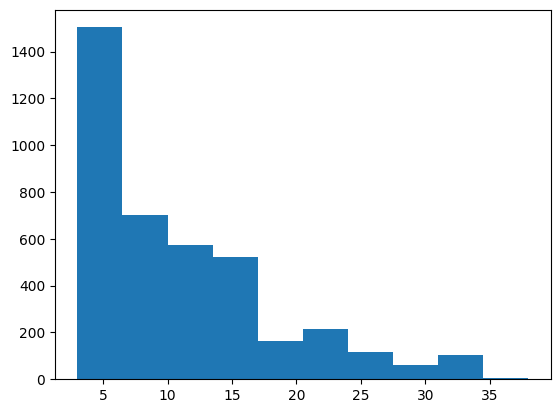

In [16]:
import matplotlib.pyplot as plt

train_lens = [len(i.split()) for i in train_text]
plt.hist(train_lens)
plt.show()

In [17]:
pad_len = 16

# Tokeniza

In [36]:
# tokenize and encode sequences
tokens_train = tokenizer.batch_encode_plus(
	train_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_val = tokenizer.batch_encode_plus(
	val_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)

tokens_test = tokenizer.batch_encode_plus(
	test_text.tolist(),
	max_length = pad_len,
	pad_to_max_length = True,
	truncation = True
)




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [43]:
tokens_train['attention_mask'][0:10]

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

# Fine-tuning modelo BERT com Keras

In [52]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

# Inicializar o modelo BERT pré-treinado para classificação binária
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Compilar o modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Fine-tuning: Treinar o modelo nas suas próprias tarefas de classificação
model.fit(np.array(tokens_train['attention_mask']), np.array(train_labels),
          validation_data=(np.array(tokens_val['attention_mask']), np.array(val_labels)),
          batch_size=32, epochs=1, steps_per_epoch=20)
#          batch_size=32, epochs=2)

# Avaliar o modelo
test_loss, test_accuracy = model.evaluate(np.array(tokens_test['attention_mask']), np.array(test_labels), batch_size=32)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


27/27 [==============================] - 44s 2s/step - loss: 0.6873 - accuracy: 0.5652
Test Loss: 0.6873303055763245, Test Accuracy: 0.5652173757553101
